In [31]:
# CERES: https://ceres.larc.nasa.gov/products.php?product=SYN1deg
# https://ceres.larc.nasa.gov/documents/ATBD/pdf/r2_2/ceres-atbd2.2-s7.0.pdf

In [32]:
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
ceres = xr.open_dataset('/home/jovyan/CERES_SYN1deg-1H_Terra-Aqua-MODIS_Ed4A_Subset_20101001-20170831.nc')
cues = xr.open_dataset('/home/jovyan/cues/summa_setup/forcings/cues_2011-2017.nc')

In [34]:
# set our simulation start/finish times
start = '2010-10-01 00:00' # simulation start time
finish = '2017-08-01 22:40' # simulation end time (had to set this to 40 min to get the two data sets to line up, they're 30 min apart)

# create new forcing data set starting with original CUES for this time period
cues_time_window = cues.loc[dict(time=slice(start, finish))]
ceres_time_window = ceres.loc[dict(time=slice(start, finish))]

# replace the CUES LW and SW with CERES LW and SW
new_forcing_data = cues_time_window.copy(data={'airpres': cues_time_window.airpres,
                                               'airtemp': cues_time_window.airtemp,
                                               'spechum': cues_time_window.spechum,
                                               'windspd': cues_time_window.windspd,
                                               'LWRadAtm': ceres_time_window.adj_atmos_lw_down_all_surface_1h[:,:,0],
                                               'SWRadAtm': ceres_time_window.adj_atmos_sw_down_all_surface_1h[:,:,0],
                                               'pptrate': cues_time_window.pptrate,
                                               'hruId': cues_time_window.hruId,
                                               'latitude': cues_time_window.latitude,
                                               'longitude': cues_time_window.longitude,
                                               'data_step': cues_time_window.data_step
                                              },deep=True)

# take a look at the structure of this new dataset
new_forcing_data

<xarray.Dataset>
Dimensions:    (hru: 1, time: 59927)
Coordinates:
  * time       (time) datetime64[ns] 2010-10-01 ... 2017-08-01T22:00:00
Dimensions without coordinates: hru
Data variables:
    airpres    (time, hru) float64 7.2e+04 7.2e+04 7.2e+04 ... 7.23e+04 7.23e+04
    airtemp    (time, hru) float64 285.9 285.8 285.3 285.3 ... 289.3 288.9 288.8
    spechum    (time, hru) float64 0.005105 0.005165 ... 0.005402 0.005181
    windspd    (time, hru) float64 2.82 0.79 0.42 0.89 ... 1.3 0.54 0.66 0.51
    SWRadAtm   (time, hru) float32 92.275 10.05 0.0 ... 733.475 641.075 594.675
    LWRadAtm   (time, hru) float32 415.625 394.575 370.15 ... 424.125 422.35
    pptrate    (time, hru) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    hruId      (hru) int32 1001
    latitude   (hru) float64 41.9
    longitude  (hru) float64 13.61
    data_step  float64 3.6e+03

In [ ]:
# save this new forcing data out to a new .nc file
new_forcing_data.to_netcdf('/home/jovyan/cues/summa_setup/forcings/forcings_cues-ceres_2011-2017.nc', mode='w')

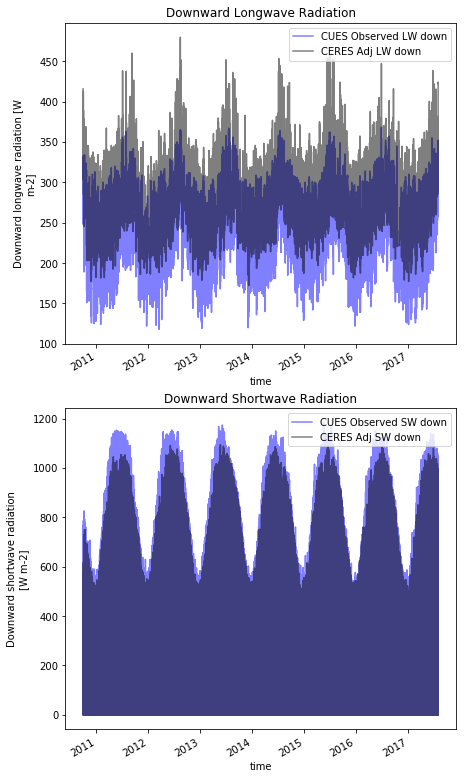

In [37]:
# open this new forcing data and compare against our original:
cues_ceres = xr.open_dataset('/home/jovyan/cues/summa_setup/forcings/forcings_cues-ceres_2011-2017.nc')

# plots
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(7,13))
cues_time_window.LWRadAtm.plot(ax=ax1, color='b',linestyle='-',alpha=0.5,label='CUES Observed LW down')
cues_ceres.LWRadAtm.plot(ax=ax1,color='k',linestyle='-',alpha=0.5,label='CERES Adj LW down')
ax1.set_title('Downward Longwave Radiation')
ax1.legend()
cues_time_window.SWRadAtm.plot(ax=ax2, color='b',linestyle='-',alpha=0.5,label='CUES Observed SW down')
cues_ceres.SWRadAtm.plot(ax=ax2,color='k',linestyle='-',alpha=0.5,label='CERES Adj SW down')
ax2.set_title('Downward Shortwave Radiation')
ax2.legend();